In [3]:

using Statistics
using Distributions

using Plots
using StatsPlots

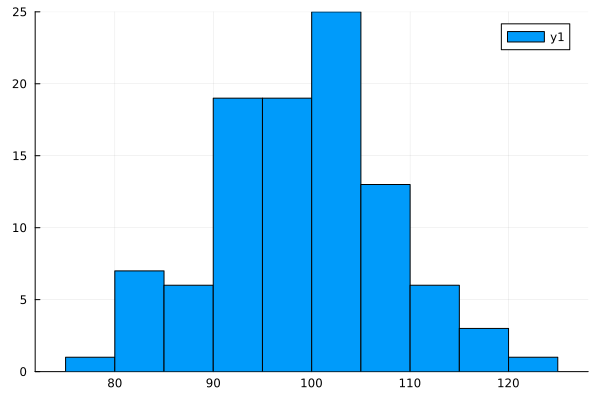

In [20]:
# Simulate orders, the number of orders is a Poisson distribution (lambda=100), the quantity is uniform between 90-110
gen_orders() = rand(Normal(100, 10), 100)
orders = gen_orders()
histogram(orders)

In [28]:
# compute service levels from a current inventory

# cycle service level: all orders are served
cycle_service(q,orders) = sum(orders) <= q ? 1 : 0

# fill rate, portion of demand served
fill_rate(q,orders) = max(1,q/sum(orders))

# supply ratio, number of orders fullfilled (assume the orders are in time sequence)
supply_ratio(q,orders) = (something(findfirst(>(q),cumsum(orders)),length(orders)+2) - 1) / length(orders) 

supply_ratio (generic function with 1 method)

In [27]:
@show sum(orders)

@show cycle_service(10000,orders)
@show fill_rate(10000,orders)
@show supply_ratio(10000,orders)
orders

sum(orders) = 9919.057934851147
cycle_service(10000, orders) = 1
fill_rate(10000, orders) = 1.0081602573228712
supply_ratio(10000, orders) = 1.01


100-element Vector{Float64}:
  94.43470667361238
  87.8051344698357
  98.97792161552898
 105.48630375539885
 114.36806305687485
 116.7078178959542
 122.18903818461898
 110.09977722026163
  83.97251504225142
  97.99323840607991
   ⋮
 105.33239209274859
 118.45445037776881
 106.10971677127444
  89.01472744549847
  92.77945093955263
 109.80663550051943
 109.54902839654498
  83.06013946276002
 100.72802791048052